# Proyek Analisis Data: [Bike Sharing Dataset ]
- **Nama:** Hafil Jammi'us Syaghir
- **Email:** m179b4ky1666@bangkit.academy
- **ID Dicoding:** hafil_jammi'us_syaghir_m179b4ky1666_bhl0:






## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pola peminjaman sepeda berdasarkan hari dalam seminggu dan tipe pengguna (casual vs registered)? Apakah ada perbedaan yang signifikan antara weekday dan weekend?
- Pertanyaan 2:  Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda secara keseluruhan?

## Import Semua Packages/Library yang Digunakan

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




## Data Wrangling

### Gathering Data

In [5]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

In [9]:
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdapat dua dataset yang digunakan, yaitu day.csv dan hour.csv.
- day.csv berisi data peminjaman sepeda per hari, sedangkan hour.csv berisi data peminjaman sepeda per jam.

### Assessing Data

In [11]:
print("Daily Data Info:")
print(day_df.info())
print(day_df.describe())

Daily Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth     holiday     w

In [12]:
print("\nMissing Values (Daily Data):")
print(day_df.isna().sum())


Missing Values (Daily Data):
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [13]:
print("\nHourly Data Info:")
print(hour_df.info())
print(hour_df.describe())


Hourly Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
          instant        

In [14]:
print("\nMissing Values (Hourly Data):")
print(hour_df.isna().sum())


Missing Values (Hourly Data):
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
 - Dataset day.csv memiliki 731 baris dan 16 kolom.
 - Dataset hour.csv memiliki 17379 baris dan 17 kolom.
 - Terdapat beberapa kolom dengan tipe data integer dan float, yang menunjukkan data numerik.
 - Terdapat kolom dengan tipe data object yang kemungkinan besar merupakan data kategorikal.


### Cleaning Data

In [22]:
day_df.drop_duplicates(inplace=True)
print("\nMissing Values (Daily Data):")
print(day_df.isna().sum())
hour_df.drop_duplicates(inplace=True)
print("\nMissing Values (Hourse Data):")
print(hour_df.isna().sum())



Missing Values (Daily Data):
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing Values (Hourse Data):
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Drop columns with missing value**

In [25]:

if 'instant' in day_df.columns:
    day_df = day_df.drop('instant', axis=1)

if 'instant' in hour_df.columns:
    hour_df = hour_df.drop('instant', axis=1)

Fill missing values with a specific value


In [31]:
hour_df.fillna(0, inplace=True)
hour_df.isna().sum()
day_df.fillna(0, inplace=True)
day_df.isna().sum()

,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


**Fill missing values with the mean of each column**

In [41]:

numeric_columns = hour_df.select_dtypes(include=np.number).columns
hour_df[numeric_columns] = hour_df[numeric_columns].fillna(hour_df[numeric_columns].mean())


hour_df.isna().sum()

numeric_columns = day_df.select_dtypes(include=np.number).columns
day_df[numeric_columns] = day_df[numeric_columns].fillna(day_df[numeric_columns].mean())

day_df.isna().sum()

,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


**Insight:**
- Kolom 'instant' dihapus dari kedua dataset karena tidak relevan untuk analisis.
- Menghapus kolom yang tidak perlu dapat meningkatkan efisiensi dan performa analisis.


## Exploratory Data Analysis (EDA)



```
# Ini diformat sebagai kode
```

### Explore day_df

In [46]:
day_df.sample(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_weekend
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,0.287278
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,0.452802
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000
25%,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,0.000000
50%,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,0.000000
75%,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,1.000000


In [47]:
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_weekend
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,0.287278
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,0.452802
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000
25%,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,0.000000
50%,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,0.000000
75%,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,1.000000


In [50]:
day_df.dteday.is_unique

True

In [52]:
day_df.dtypes.duplicated()

,0
dteday,False
season,False
yr,True
mnth,True
holiday,True
weekday,True
workingday,True
weathersit,True
temp,False
atemp,True


Explore hour_df

In [45]:
hour_df.sample(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8780,2012-01-06,1,1,1,16,0,5,1,1,0.52,0.5000,0.27,0.2836,35,259,294
12560,2012-06-12,2,1,6,13,0,2,1,3,0.66,0.6061,0.83,0.1940,11,48,59
9057,2012-01-18,1,1,1,7,0,3,1,1,0.32,0.2879,0.42,0.3582,1,262,263
12552,2012-06-12,2,1,6,5,0,2,1,3,0.60,0.5455,0.88,0.1343,1,28,29
11041,2012-04-10,2,1,4,5,0,2,1,1,0.34,0.3333,0.71,0.1343,0,24,24


In [49]:
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [51]:
hour_df.dteday.is_unique

False

In [53]:
hour_df.dtypes.duplicated()

,0
dteday,False
season,False
yr,True
mnth,True
hr,True
holiday,True
weekday,True
workingday,True
weathersit,True
temp,False


# Mengeksplor data dari rentang waktu tertentu (2011 - 01 01 ) Sampai (2012-12-31)

In [64]:
selected_dataset = "Daily Data"
df = day_df if selected_dataset == "Daily Data" else hour_df
time_column = 'dteday' if selected_dataset == "Daily Data" else 'hr'

start_date = pd.to_datetime('2011-01-01')
end_date = pd.to_datetime('2012-12-31')

df['dteday'] = pd.to_datetime(df['dteday'])

filtered_df = df[(df['dteday'] >= start_date) & (df['dteday'] <= end_date)]

if selected_dataset == "Hourly Data":
    start_hour = 0
    end_hour = 23
    filtered_df = filtered_df[(filtered_df['hr'] >= start_hour) & (filtered_df['hr'] <= end_hour)]

print(filtered_df)
display(filtered_df)

        dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0   2011-01-01       1   0     1        0        6           0           2   
1   2011-01-02       1   0     1        0        0           0           2   
2   2011-01-03       1   0     1        0        1           1           1   
3   2011-01-04       1   0     1        0        2           1           1   
4   2011-01-05       1   0     1        0        3           1           1   
..         ...     ...  ..   ...      ...      ...         ...         ...   
726 2012-12-27       1   1    12        0        4           1           2   
727 2012-12-28       1   1    12        0        5           1           2   
728 2012-12-29       1   1    12        0        6           0           2   
729 2012-12-30       1   1    12        0        0           0           1   
730 2012-12-31       1   1    12        0        1           1           2   

         temp     atemp       hum  windspeed  casual  registere

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_weekend
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,0
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,0
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,1
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,1


# Grouping penggunaan sepeda dan pengaruh kondisi cuaca terhadap peminjaman

In [66]:
print("\nGrouping and Aggregation by Weekday:")
weekday_summary = filtered_df.groupby(by="weekday").agg({
    "cnt": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"],
    "casual": ["max", "min", "mean"]
})
print(weekday_summary)


print("\nGrouping and Aggregation by Weather Situation:")
weather_summary = filtered_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean", "sum"],
    "registered": ["max", "min", "mean"],
    "casual": ["max", "min", "mean"]
})
print(weather_summary)


Grouping and Aggregation by Weekday:
          cnt                    registered                    casual      \
          max   min         mean        max   min         mean    max min   
weekday                                                                     
0        8227   605  4228.828571       5657   451  2890.533333   3283  54   
1        7525    22  4338.123810       6435    20  3663.990476   3065   2   
2        7767   683  4510.663462       6697   573  3954.480769   1348   9   
3        8173   441  4548.538462       6946   432  3997.394231   2562   9   
4        7804   431  4667.259615       6781   416  4076.298077   1405  15   
5        8362  1167  4690.288462       6917  1129  3938.000000   2469  38   
6        8714   627  4550.542857       5966   570  3085.285714   3410  57   

                      
                mean  
weekday               
0        1338.295238  
1         674.133333  
2         556.182692  
3         551.144231  
4         590.961538  
5      

**Analisis Penggunaan Sepeda Berdasarkan Hari dan Cuaca**

In [62]:
day_df['is_weekend'] = day_df['weekday'].apply(lambda x: 1 if x in (6, 0) else 0)
weekend_usage = day_df.groupby('is_weekend')[['cnt', 'casual', 'registered']].mean()
weather_rentals = day_df.groupby('weathersit')['cnt'].sum()


display(weekend_usage)
display(weather_rentals)


,cnt,casual,registered
is_weekend,,,
0,4550.566219,625.036468,3925.529750
1,4389.685714,1401.776190,2987.909524


,cnt
weathersit,
1,2257952
2,996858
3,37869


**Insight:**
- Kolom 'is_weekend' ditambahkan untuk menandai hari weekend (1) dan weekday (0).
- Rata-rata jumlah peminjaman sepeda, baik untuk pengguna casual maupun registered, dihitung untuk weekday dan weekend.
- Total peminjaman sepeda berdasarkan kategori cuaca dihitung untuk melihat pengaruh cuaca terhadap peminjaman.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

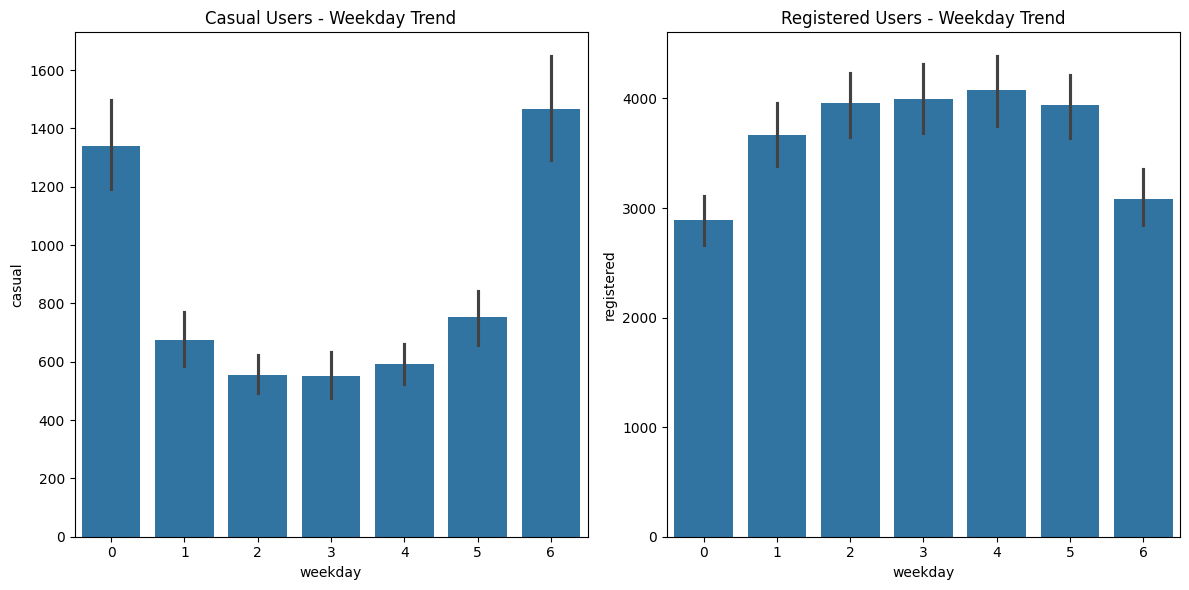

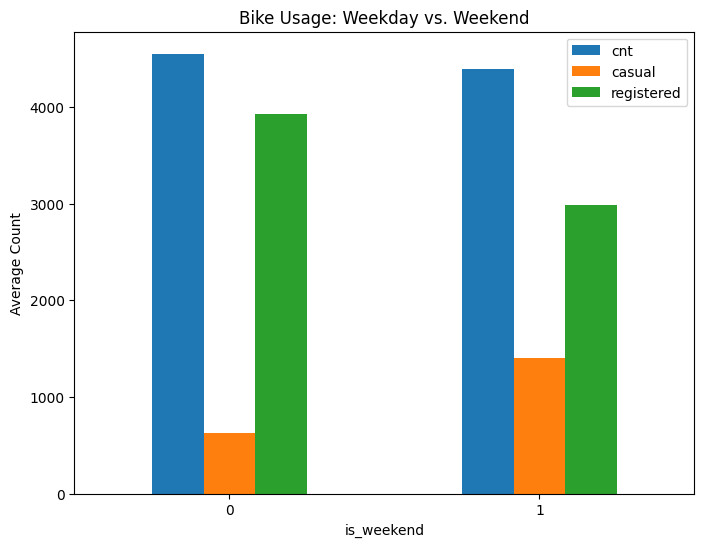

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='weekday', y='casual', data=day_df)
plt.title('Casual Users - Weekday Trend')
plt.subplot(1, 2, 2)
sns.barplot(x='weekday', y='registered', data=day_df)
plt.title('Registered Users - Weekday Trend')
plt.tight_layout()
plt.show()

weekend_usage.plot(kind='bar', figsize=(8, 6))
plt.title('Bike Usage: Weekday vs. Weekend')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 2:

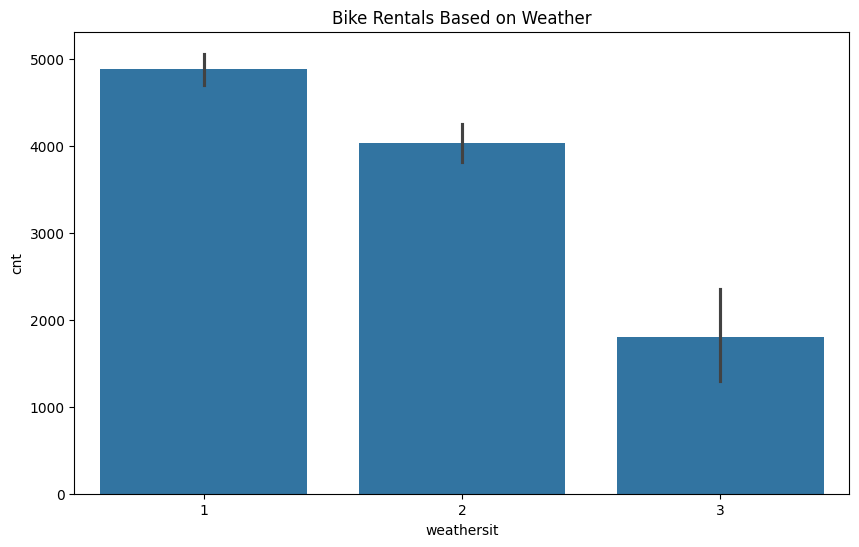

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=day_df)
plt.title('Bike Rentals Based on Weather')
plt.show()

**Insight:**
-Terlihat bahwa pengguna casual lebih banyak menggunakan sepeda di akhir pekan, sedangkan pengguna registered lebih banyak menggunakan sepeda di hari kerja.
- Cuaca yang cerah (weathersit 1) memiliki jumlah peminjaman sepeda tertinggi, sedangkan cuaca buruk (weathersit 3) memiliki jumlah peminjaman terendah.

## Analisis Lanjutan (Opsional)

## Conclusion

Conclution pertanyaan 1: Pengguna terdaftar menunjukkan pola peminjaman yang lebih tinggi di hari kerja, sedangkan pengguna casual lebih aktif di akhir pekan. Hal ini mengindikasikan bahwa pengguna terdaftar cenderung menggunakan layanan bike sharing untuk aktivitas rutin seperti komuting, sementara pengguna casual menggunakannya untuk rekreasi di akhir pekan.

Conclution pertanyaan 2:  Cuaca memiliki pengaruh yang kuat terhadap jumlah peminjaman sepeda. Cuaca cerah (weathersit 1) mendorong peminjaman, sedangkan cuaca buruk (weathersit 2 & 3) secara signifikan mengurangi jumlah peminjaman.  Perusahaan bike sharing dapat mempertimbangkan strategi pemasaran atau operasional yang disesuaikan dengan kondisi cuaca.